In [55]:
import tensorflow as tf
import tensorflow_datasets as tfds

In [67]:
(ds_train, ds_test), ds_info = tfds.load(
    'mnist',
    split=['train', 'test'],
    shuffle_files=True,
    with_info=True,
)

In [70]:
ds_test

<_PrefetchDataset element_spec={'image': TensorSpec(shape=(28, 28, 1), dtype=tf.uint8, name=None), 'label': TensorSpec(shape=(), dtype=tf.int64, name=None)}>

In [72]:
ds_train = ds_train.batch(32).map(lambda x: (tf.cast(x['image'], tf.float16), x['label']))

In [73]:
ds_train

<_MapDataset element_spec=(TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float16, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

In [74]:
ds_test = ds_test.batch(32).map(lambda x: (tf.cast(x['image'], tf.float16), x['label']))

In [82]:
model_0 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=[28,28,1]),
    tf.keras.layers.Conv2D(8,3,activation="relu"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(16,3,activation="relu"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(32,3,activation="relu"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.GlobalMaxPool2D(),
    tf.keras.layers.Dense(10, activation="softmax")
    ])
model_0.compile(
    loss="sparse_categorical_crossentropy",
    optimizer="adam",
    metrics="accuracy"
)
early_stop = tf.keras.callbacks.EarlyStopping(restore_best_weights=True, patience=7, verbose=1)


history_0 = model_0.fit(ds_train, validation_data= ds_test
    , epochs=100, callbacks=[early_stop]
)

Epoch 1/100
1875/1875 [==============================] - 20s 10ms/step - loss: 3.9322 - accuracy: 0.3323 - val_loss: 1.0511 - val_accuracy: 0.7098
Epoch 2/100
1875/1875 [==============================] - 20s 11ms/step - loss: 0.9462 - accuracy: 0.6882 - val_loss: 0.4562 - val_accuracy: 0.8779
Epoch 3/100
1875/1875 [==============================] - 21s 11ms/step - loss: 0.5599 - accuracy: 0.8227 - val_loss: 0.3251 - val_accuracy: 0.9132
Epoch 4/100
1875/1875 [==============================] - 22s 11ms/step - loss: 0.4241 - accuracy: 0.8665 - val_loss: 0.2404 - val_accuracy: 0.9344
Epoch 5/100
1875/1875 [==============================] - 23s 12ms/step - loss: 0.3478 - accuracy: 0.8903 - val_loss: 0.2297 - val_accuracy: 0.9355
Epoch 6/100
1875/1875 [==============================] - 22s 12ms/step - loss: 0.3055 - accuracy: 0.9029 - val_loss: 0.2172 - val_accuracy: 0.9394
Epoch 7/100
1875/1875 [==============================] - 21s 11ms/step - loss: 0.2772 - accuracy: 0.9135 - val_loss: 0

In [84]:
model_1 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=[28,28,1]),
    tf.keras.layers.Conv2D(8,3,activation="relu"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(16,3,activation="relu"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(32,3,activation="relu"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.GlobalMaxPool2D(),
    tf.keras.layers.Dense(10, activation="softmax")
    ])
model_1.compile(
    loss="sparse_categorical_crossentropy",
    optimizer="adam",
    metrics="accuracy"
)

early_stop = tf.keras.callbacks.EarlyStopping(restore_best_weights=True, patience=7, verbose=1)
lr_callback = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=3,
    min_lr=1e-6)


history_1 = model_1.fit(ds_train, validation_data= ds_test
    , epochs=100, callbacks=[early_stop, lr_callback]
)

Epoch 1/100
1875/1875 [==============================] - 22s 12ms/step - loss: 2.4209 - accuracy: 0.4737 - val_loss: 0.7081 - val_accuracy: 0.7909 - lr: 0.0010
Epoch 2/100
1875/1875 [==============================] - 23s 12ms/step - loss: 0.6975 - accuracy: 0.7722 - val_loss: 0.3445 - val_accuracy: 0.9091 - lr: 0.0010
Epoch 3/100
1875/1875 [==============================] - 23s 12ms/step - loss: 0.4469 - accuracy: 0.8578 - val_loss: 0.2685 - val_accuracy: 0.9279 - lr: 0.0010
Epoch 4/100
1875/1875 [==============================] - 24s 13ms/step - loss: 0.3445 - accuracy: 0.8904 - val_loss: 0.1788 - val_accuracy: 0.9519 - lr: 0.0010
Epoch 5/100
1875/1875 [==============================] - 25s 13ms/step - loss: 0.2929 - accuracy: 0.9086 - val_loss: 0.1700 - val_accuracy: 0.9524 - lr: 0.0010
Epoch 6/100
1875/1875 [==============================] - 25s 13ms/step - loss: 0.2573 - accuracy: 0.9191 - val_loss: 0.1523 - val_accuracy: 0.9599 - lr: 0.0010
Epoch 7/100
1875/1875 [=================

In [93]:
import seaborn as sns
import matplotlib.pyplot as plt

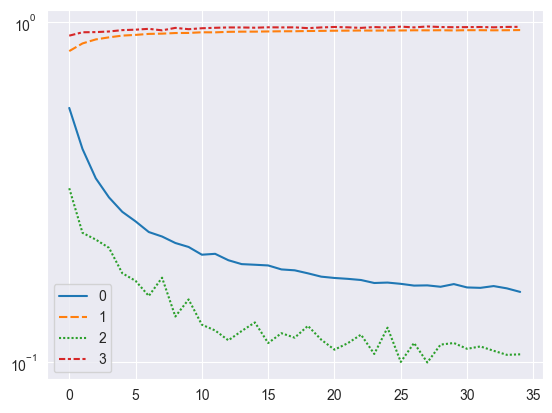

In [107]:
sns.lineplot([history_0.history[key][2:] for key in ['loss', 'accuracy', 'val_loss', 'val_accuracy']])
plt.yscale('log')

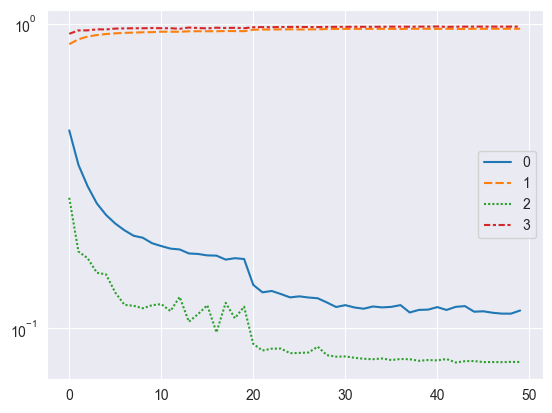

In [106]:
sns.lineplot([history_1.history[key][2:] for key in ['loss', 'accuracy', 'val_loss', 'val_accuracy']])
plt.yscale('log')

In [96]:
history_1.history

{'loss': [2.4208831787109375,
  0.697496235370636,
  0.44693538546562195,
  0.3444809317588806,
  0.29294222593307495,
  0.2572513818740845,
  0.235805943608284,
  0.22096844017505646,
  0.20996856689453125,
  0.20144639909267426,
  0.19840168952941895,
  0.19040527939796448,
  0.1863504946231842,
  0.18278363347053528,
  0.1816241592168808,
  0.17623773217201233,
  0.1755354106426239,
  0.17365212738513947,
  0.1733528971672058,
  0.16821324825286865,
  0.17002291977405548,
  0.16896595060825348,
  0.13891096413135529,
  0.13131532073020935,
  0.13268114626407623,
  0.12964452803134918,
  0.12639206647872925,
  0.12740673124790192,
  0.12627746164798737,
  0.12556301057338715,
  0.12163415551185608,
  0.11753341555595398,
  0.11919490247964859,
  0.11710426211357117,
  0.11602260917425156,
  0.11800523102283478,
  0.11718140542507172,
  0.11764136701822281,
  0.11923541873693466,
  0.11276239901781082,
  0.1149822250008583,
  0.1152343675494194,
  0.11745696514844894,
  0.114941231906